In [2]:
#!/usr/bin/env python3

import pandas as pd
import numpy as np
from skimage import io, metrics, color, transform
import os
from pathlib import Path

def load_and_preprocess_image(image_path):
    """Load and preprocess image for SSIM calculation"""
    try:
        img = io.imread(image_path)
        # Convert to grayscale if needed
        if len(img.shape) == 3:
            img = color.rgb2gray(img)
        return img
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

def calculate_ssim_score(img1_path, img2_path):
    """Calculate SSIM score between two images"""
    img1 = load_and_preprocess_image(img1_path)
    img2 = load_and_preprocess_image(img2_path)
    
    if img1 is None or img2 is None:
        return None
    
    # Resize images to same size if needed
    if img1.shape != img2.shape:
        # Resize to smaller dimensions to preserve detail
        min_height = min(img1.shape[0], img2.shape[0])
        min_width = min(img1.shape[1], img2.shape[1])
        img1 = transform.resize(img1, (min_height, min_width), anti_aliasing=True)
        img2 = transform.resize(img2, (min_height, min_width), anti_aliasing=True)
    
    try:
        ssim_score = metrics.structural_similarity(img1, img2, data_range=1.0)
        return ssim_score
    except Exception as e:
        print(f"Error calculating SSIM: {e}")
        return None
    


def calculate_ssim_score(img1_path, img2_path):
    """Calculate SSIM score between two images"""
    img1 = load_and_preprocess_image(img1_path)
    img2 = load_and_preprocess_image(img2_path)
    
    if img1 is None or img2 is None:
        return None
    
    # Resize images to same size if needed
    if img1.shape != img2.shape:
        # Resize to smaller dimensions to preserve detail
        min_height = min(img1.shape[0], img2.shape[0])
        min_width = min(img1.shape[1], img2.shape[1])
        img1 = transform.resize(img1, (min_height, min_width), anti_aliasing=True)
        img2 = transform.resize(img2, (min_height, min_width), anti_aliasing=True)
    
    try:
        ssim_score = metrics.structural_similarity(img1, img2, data_range=1.0)
        return ssim_score
    except Exception as e:
        print(f"Error calculating SSIM: {e}")
        return None

In [4]:
# Load data
participant_info = pd.read_csv('/Users/jeongin/oopt/participant_info.csv')
rating_data = pd.read_csv('/Users/jeongin/oopt/result/image/image_rating_pairs.csv')

# Create mapping of participant to target images
target_mapping = {}
for _, row in participant_info.iterrows():
    participant = row['participants']
    target_mapping[participant] = {
        'system1': row['System 1'],
        'system2': row['System 2']
    }

# Initialize results list
results = []

# Process each rating entry
for idx, row in rating_data.iterrows():
    person = row['person'].upper()  # Normalize case
    system_type = row['system_type']
    image_path = row['image_path']
    rating = row['rating']
    
    # Get the target image for this participant and system
    if person in target_mapping:
        target_name = target_mapping[person][system_type]
        target_path = f'/Users/jeongin/oopt/target/{target_name}.png'
        
        # Calculate SSIM
        ssim_score = calculate_ssim_score(image_path, target_path)
        
        results.append({
            'participant': person,
            'system': system_type,
            'image_path': image_path,
            'rating': rating,
            'ssim_score': ssim_score
        })
        
        # print(f"Processed {person} {system_type}: SSIM={ssim_score:.4f}" if ssim_score else f"Failed to process {person} {system_type}")
    else:
        print(f"No target mapping found for participant: {person}")
        results.append({
            'participant': person,
            'system': system_type,
            'image_path': image_path,
            'rating': rating,
            'ssim_score': None
        })

# Create DataFrame and save results
results_df = pd.DataFrame(results)
output_path = '/Users/jeongin/oopt/result/ssim/image_rating_ssim.csv'
results_df.to_csv(output_path, index=False)

# # print(f"\nResults saved to: {output_path}")
# print(f"Total processed: {len(results_df)}")
# print(f"Successful SSIM calculations: {len(results_df[results_df['ssim_score'].notna()])}")
# print(f"Failed calculations: {len(results_df[results_df['ssim_score'].isna()])}")

# # Display summary statistics
# valid_ssim = results_df['ssim_score'].dropna()
# if len(valid_ssim) > 0:
#     print(f"\nSSIM Score Statistics:")
#     print(f"Mean: {valid_ssim.mean():.4f}")
#     print(f"Std:  {valid_ssim.std():.4f}")
#     print(f"Min:  {valid_ssim.min():.4f}")
#     print(f"Max:  {valid_ssim.max():.4f}")


In [5]:
results_df


,participant,system,image_path,rating,ssim_score
0,P1,system1,/Users/jeongin/oopt/output/P1/2025-08-24_11-33...,6.0,0.448098
1,P1,system1,/Users/jeongin/oopt/output/P1/2025-08-24_11-38...,4.0,0.416317
2,P1,system1,/Users/jeongin/oopt/output/P1/2025-08-24_11-40...,5.0,0.408759
3,P1,system2,/Users/jeongin/oopt/output/P1/2025-08-24_11-56...,3.0,0.414763
4,P1,system2,/Users/jeongin/oopt/output/P1/2025-08-24_12-02...,6.0,0.418633
...,...,...,...,...,...
79,P2,system2,/Users/jeongin/oopt/output/p2/2025-08-14_01-32...,3.0,0.338802
80,P2,system2,/Users/jeongin/oopt/output/p2/2025-08-14_01-34...,4.0,0.276080
81,P2,system1,/Users/jeongin/oopt/output/p2/2025-08-14_01-41...,5.0,0.250439
82,P2,system1,/Users/jeongin/oopt/output/p2/2025-08-14_01-44...,5.0,0.232879


In [7]:
#!/usr/bin/env python3

import pandas as pd
import numpy as np

def analyze_ssim_statistics():
    # Load the data
    df = pd.read_csv('/Users/jeongin/oopt/result/ssim/image_rating_ssim.csv')

    print("=== SSIM Score Statistics ===")
    print(f"Total samples: {len(df)}")
    print(f"Mean SSIM: {df['ssim_score'].mean():.4f}")
    print(f"Std SSIM: {df['ssim_score'].std():.4f}")
    print(f"Min SSIM: {df['ssim_score'].min():.4f}")
    print(f"Max SSIM: {df['ssim_score'].max():.4f}")
    
    print("\n=== Rating Statistics ===")
    print(f"Mean Rating: {df['rating'].mean():.4f}")
    print(f"Std Rating: {df['rating'].std():.4f}")
    print(f"Min Rating: {df['rating'].min():.4f}")
    print(f"Max Rating: {df['rating'].max():.4f}")
    
    print("\n=== Top 10 Highest SSIM Scores ===")
    top_ssim = df.nlargest(10, 'ssim_score')
    for _, row in top_ssim.iterrows():
        print(f"{row['participant']} {row['system']}: SSIM={row['ssim_score']:.4f}, Rating={row['rating']}")
    
    print("\n=== Top 10 Highest Ratings ===")
    top_ratings = df.nlargest(10, 'rating')
    for _, row in top_ratings.iterrows():
        print(f"{row['participant']} {row['system']}: Rating={row['rating']}, SSIM={row['ssim_score']:.4f}")
    
    print("\n=== Images with Rating = 7 ===")
    rating_7 = df[df['rating'] == 7.0]
    if len(rating_7) > 0:
        for _, row in rating_7.iterrows():
            print(f"{row['participant']} {row['system']}: SSIM={row['ssim_score']:.4f}")
    else:
        print("No images with rating 7")
    
    print("\n=== Images with Rating = 6 ===")
    rating_6 = df[df['rating'] == 6.0]
    print(f"Count: {len(rating_6)}")
    print(f"Mean SSIM for rating 6: {rating_6['ssim_score'].mean():.4f}")
    print(f"Std SSIM for rating 6: {rating_6['ssim_score'].std():.4f}")
    
    print("\n=== Correlation between Rating and SSIM ===")
    correlation = df['rating'].corr(df['ssim_score'])
    print(f"Pearson correlation coefficient: {correlation:.4f}")
    
    print("\n=== Statistics by System Type ===")
    for system in ['system1', 'system2']:
        system_data = df[df['system'] == system]
        print(f"\n{system.upper()}:")
        print(f"  Count: {len(system_data)}")
        print(f"  Mean SSIM: {system_data['ssim_score'].mean():.4f}")
        print(f"  Mean Rating: {system_data['rating'].mean():.4f}")
        print(f"  SSIM-Rating correlation: {system_data['rating'].corr(system_data['ssim_score']):.4f}")
    
    print("\n=== Statistics by Participant ===")
    participant_stats = df.groupby('participant').agg({
        'ssim_score': ['mean', 'std', 'count'],
        'rating': ['mean', 'std']
    }).round(4)
    print(participant_stats)

if __name__ == "__main__":
    analyze_ssim_statistics()

=== SSIM Score Statistics ===
Total samples: 84
Mean SSIM: 0.3650
Std SSIM: 0.0496
Min SSIM: 0.2329
Max SSIM: 0.4481

=== Rating Statistics ===
Mean Rating: 4.4048
Std Rating: 1.4489
Min Rating: 1.0000
Max Rating: 7.0000

=== Top 10 Highest SSIM Scores ===
P1 system1: SSIM=0.4481, Rating=6.0
P11 system1: SSIM=0.4398, Rating=3.0
P6 system2: SSIM=0.4384, Rating=3.0
P6 system2: SSIM=0.4313, Rating=5.0
P6 system2: SSIM=0.4299, Rating=4.0
P5 system2: SSIM=0.4273, Rating=7.0
P6 system2: SSIM=0.4244, Rating=5.0
P6 system2: SSIM=0.4214, Rating=6.0
P1 system2: SSIM=0.4196, Rating=4.0
P1 system2: SSIM=0.4186, Rating=6.0

=== Top 10 Highest Ratings ===
P5 system2: Rating=7.0, SSIM=0.4273
P5 system1: Rating=7.0, SSIM=0.3522
P7 system2: Rating=7.0, SSIM=0.2479
P1 system1: Rating=6.0, SSIM=0.4481
P1 system2: Rating=6.0, SSIM=0.4186
P11 system2: Rating=6.0, SSIM=0.3816
P3 system2: Rating=6.0, SSIM=0.4185
P5 system2: Rating=6.0, SSIM=0.3462
P5 system2: Rating=6.0, SSIM=0.3628
P5 system2: Rating=6.0, S

In [8]:
#!/usr/bin/env python3

import pandas as pd
import numpy as np
from scipy import stats

def compare_systems():
    # Load the data
    df = pd.read_csv('/Users/jeongin/oopt/result/ssim/image_rating_ssim.csv')
    
    # Separate data by system
    system1_data = df[df['system'] == 'system1']
    system2_data = df[df['system'] == 'system2']
    
    print("=== SYSTEM COMPARISON ===\n")
    
    print("BASIC STATISTICS:")
    print(f"System 1 - Count: {len(system1_data)}")
    print(f"System 2 - Count: {len(system2_data)}")
    
    print(f"\nSSIM SCORES:")
    print(f"System 1 - Mean: {system1_data['ssim_score'].mean():.4f} ± {system1_data['ssim_score'].std():.4f}")
    print(f"System 2 - Mean: {system2_data['ssim_score'].mean():.4f} ± {system2_data['ssim_score'].std():.4f}")
    
    print(f"\nRATINGS:")
    print(f"System 1 - Mean: {system1_data['rating'].mean():.4f} ± {system1_data['rating'].std():.4f}")
    print(f"System 2 - Mean: {system2_data['rating'].mean():.4f} ± {system2_data['rating'].std():.4f}")
    
    # Statistical tests
    print(f"\nSTATISTICAL TESTS:")
    
    # T-test for SSIM scores
    ssim_tstat, ssim_pvalue = stats.ttest_ind(system1_data['ssim_score'], system2_data['ssim_score'])
    print(f"SSIM t-test: t={ssim_tstat:.4f}, p={ssim_pvalue:.4f}")
    
    # T-test for ratings
    rating_tstat, rating_pvalue = stats.ttest_ind(system1_data['rating'], system2_data['rating'])
    print(f"Rating t-test: t={rating_tstat:.4f}, p={rating_pvalue:.4f}")
    
    # Mann-Whitney U test (non-parametric alternative)
    ssim_ustat, ssim_upvalue = stats.mannwhitneyu(system1_data['ssim_score'], system2_data['ssim_score'], alternative='two-sided')
    rating_ustat, rating_upvalue = stats.mannwhitneyu(system1_data['rating'], system2_data['rating'], alternative='two-sided')
    print(f"SSIM Mann-Whitney U: U={ssim_ustat:.4f}, p={ssim_upvalue:.4f}")
    print(f"Rating Mann-Whitney U: U={rating_ustat:.4f}, p={rating_upvalue:.4f}")
    
    print(f"\nTOP PERFORMERS:")
    print(f"\nTop 5 SSIM scores by system:")
    print("System 1:")
    top_ssim_s1 = system1_data.nlargest(5, 'ssim_score')
    for _, row in top_ssim_s1.iterrows():
        print(f"  {row['participant']}: SSIM={row['ssim_score']:.4f}, Rating={row['rating']}")
    
    print("System 2:")
    top_ssim_s2 = system2_data.nlargest(5, 'ssim_score')
    for _, row in top_ssim_s2.iterrows():
        print(f"  {row['participant']}: SSIM={row['ssim_score']:.4f}, Rating={row['rating']}")
    
    print(f"\nTop 5 Ratings by system:")
    print("System 1:")
    top_rating_s1 = system1_data.nlargest(5, 'rating')
    for _, row in top_rating_s1.iterrows():
        print(f"  {row['participant']}: Rating={row['rating']}, SSIM={row['ssim_score']:.4f}")
    
    print("System 2:")
    top_rating_s2 = system2_data.nlargest(5, 'rating')
    for _, row in top_rating_s2.iterrows():
        print(f"  {row['participant']}: Rating={row['rating']}, SSIM={row['ssim_score']:.4f}")
    
    # Correlation analysis
    print(f"\nCORRELATION ANALYSIS:")
    corr_s1 = system1_data['rating'].corr(system1_data['ssim_score'])
    corr_s2 = system2_data['rating'].corr(system2_data['ssim_score'])
    print(f"System 1 Rating-SSIM correlation: {corr_s1:.4f}")
    print(f"System 2 Rating-SSIM correlation: {corr_s2:.4f}")
    
    # Per-participant comparison
    print(f"\nPER-PARTICIPANT COMPARISON:")
    participants = df['participant'].unique()
    
    better_ssim_count = {'system1': 0, 'system2': 0, 'tie': 0}
    better_rating_count = {'system1': 0, 'system2': 0, 'tie': 0}
    
    for participant in participants:
        p_data = df[df['participant'] == participant]
        s1_data = p_data[p_data['system'] == 'system1']
        s2_data = p_data[p_data['system'] == 'system2']
        
        if len(s1_data) > 0 and len(s2_data) > 0:
            s1_mean_ssim = s1_data['ssim_score'].mean()
            s2_mean_ssim = s2_data['ssim_score'].mean()
            s1_mean_rating = s1_data['rating'].mean()
            s2_mean_rating = s2_data['rating'].mean()
            
            # Count which system is better for each participant
            if s1_mean_ssim > s2_mean_ssim:
                better_ssim_count['system1'] += 1
            elif s2_mean_ssim > s1_mean_ssim:
                better_ssim_count['system2'] += 1
            else:
                better_ssim_count['tie'] += 1
                
            if s1_mean_rating > s2_mean_rating:
                better_rating_count['system1'] += 1
            elif s2_mean_rating > s1_mean_rating:
                better_rating_count['system2'] += 1
            else:
                better_rating_count['tie'] += 1
            
            print(f"{participant}: S1_SSIM={s1_mean_ssim:.3f}, S2_SSIM={s2_mean_ssim:.3f}, S1_Rating={s1_mean_rating:.1f}, S2_Rating={s2_mean_rating:.1f}")
    
    print(f"\nSUMMARY:")
    print(f"Participants where System 1 has better SSIM: {better_ssim_count['system1']}")
    print(f"Participants where System 2 has better SSIM: {better_ssim_count['system2']}")
    print(f"Participants where System 1 has better Rating: {better_rating_count['system1']}")
    print(f"Participants where System 2 has better Rating: {better_rating_count['system2']}")

if __name__ == "__main__":
    compare_systems()

=== SYSTEM COMPARISON ===

BASIC STATISTICS:
System 1 - Count: 37
System 2 - Count: 47

SSIM SCORES:
System 1 - Mean: 0.3577 ± 0.0504
System 2 - Mean: 0.3707 ± 0.0488

RATINGS:
System 1 - Mean: 4.4054 ± 1.3836
System 2 - Mean: 4.4043 ± 1.5131

STATISTICAL TESTS:
SSIM t-test: t=-1.1919, p=0.2367
Rating t-test: t=0.0036, p=0.9971
SSIM Mann-Whitney U: U=726.0000, p=0.1976
Rating Mann-Whitney U: U=860.5000, p=0.9374

TOP PERFORMERS:

Top 5 SSIM scores by system:
System 1:
  P1: SSIM=0.4481, Rating=6.0
  P11: SSIM=0.4398, Rating=3.0
  P1: SSIM=0.4163, Rating=4.0
  P1: SSIM=0.4088, Rating=5.0
  P11: SSIM=0.3999, Rating=2.0
System 2:
  P6: SSIM=0.4384, Rating=3.0
  P6: SSIM=0.4313, Rating=5.0
  P6: SSIM=0.4299, Rating=4.0
  P5: SSIM=0.4273, Rating=7.0
  P6: SSIM=0.4244, Rating=5.0

Top 5 Ratings by system:
System 1:
  P5: Rating=7.0, SSIM=0.3522
  P1: Rating=6.0, SSIM=0.4481
  P5: Rating=6.0, SSIM=0.3727
  P5: Rating=6.0, SSIM=0.3392
  P5: Rating=6.0, SSIM=0.3275
System 2:
  P5: Rating=7.0, S

/var/folders/yy/wmmdvn295kn5535yf3g57f2m0000gn/T/ipykernel_94818/3168165238.py:17: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  plt.tight_layout()
/var/folders/yy/wmmdvn295kn5535yf3g57f2m0000gn/T/ipykernel_94818/3168165238.py:17: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  plt.tight_layout()
/var/folders/yy/wmmdvn295kn5535yf3g57f2m0000gn/T/ipykernel_94818/3168165238.py:17: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
/Users/jeongin/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jeongin/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jeongin/Library/P

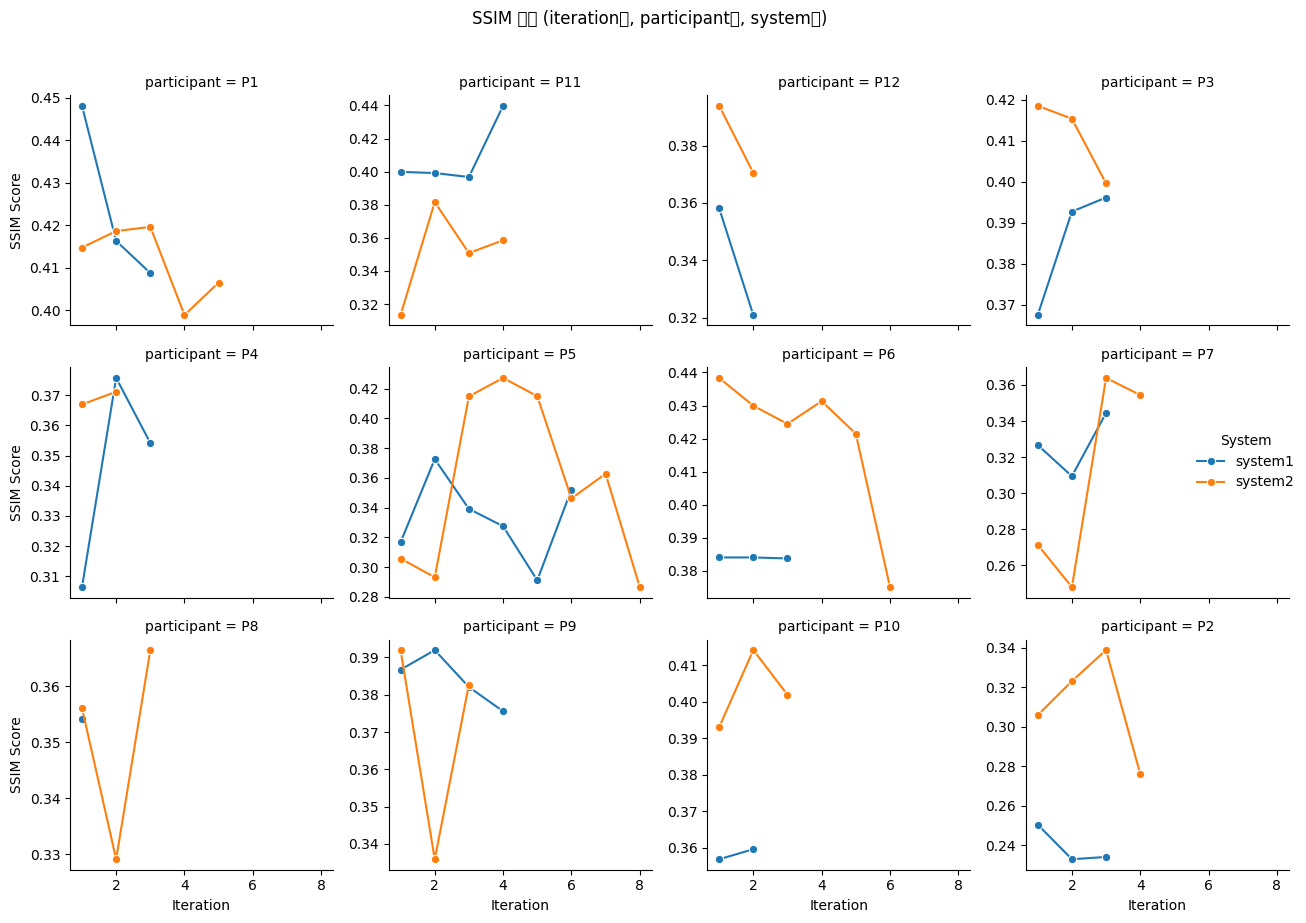

/var/folders/yy/wmmdvn295kn5535yf3g57f2m0000gn/T/ipykernel_94818/3168165238.py:26: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  plt.tight_layout()
/var/folders/yy/wmmdvn295kn5535yf3g57f2m0000gn/T/ipykernel_94818/3168165238.py:26: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  plt.tight_layout()
/var/folders/yy/wmmdvn295kn5535yf3g57f2m0000gn/T/ipykernel_94818/3168165238.py:26: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
/Users/jeongin/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jeongin/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jeongin/Library/P

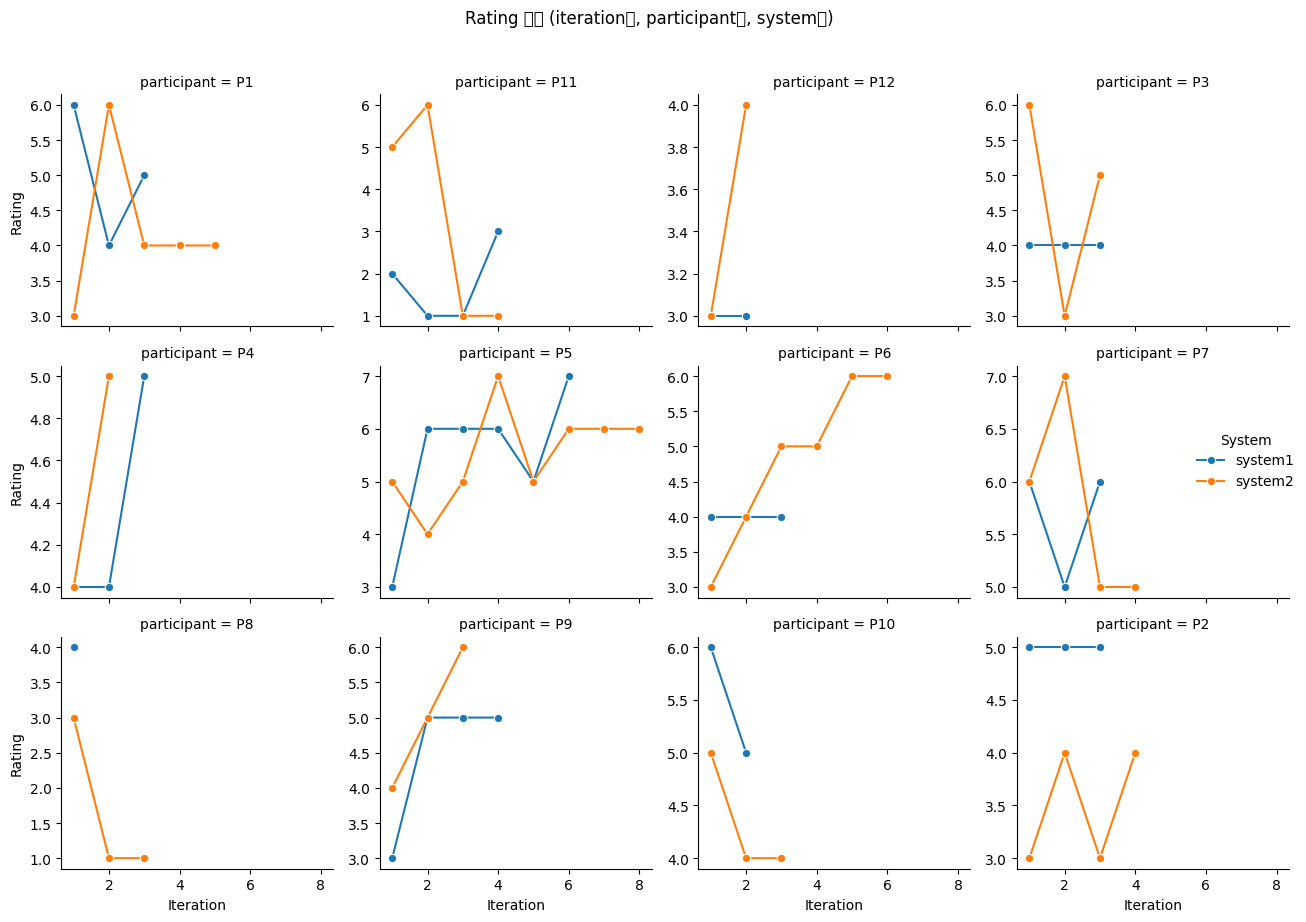

In [5]:
# participant/system별로 row 순서대로 iteration 번호 부여 후, SSIM/rating 변화 시각화
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('result/ssim/image_rating_ssim.csv')

# 각 participant/system별로 순서대로 iteration 번호 부여
df['iteration'] = df.groupby(['participant', 'system']).cumcount() + 1

# 1. SSIM 변화: participant별, system별, iteration별
g = sns.FacetGrid(df, col='participant', hue='system', col_wrap=4, height=3, sharey=False, palette={'system1':'#1f77b4','system2':'#ff7f0e'})
g.map(sns.lineplot, 'iteration', 'ssim_score', marker='o')
g.add_legend(title='System')
g.set_axis_labels('Iteration', 'SSIM Score')
g.fig.suptitle('SSIM 변화 (iteration별, participant별, system별)', y=1.02)
plt.tight_layout()
plt.show()

# 2. Rating 변화: participant별, system별, iteration별
g2 = sns.FacetGrid(df, col='participant', hue='system', col_wrap=4, height=3, sharey=False, palette={'system1':'#1f77b4','system2':'#ff7f0e'})
g2.map(sns.lineplot, 'iteration', 'rating', marker='o')
g2.add_legend(title='System')
g2.set_axis_labels('Iteration', 'Rating')
g2.fig.suptitle('Rating 변화 (iteration별, participant별, system별)', y=1.02)
plt.tight_layout()
plt.show()